# **Imports**

In [32]:
# data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# machine learning models/ processing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.mixture import GaussianMixture

# dealing with imbalanced class distributions
from imblearn.under_sampling import ClusterCentroids

In [2]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 100)

# **A. Data Exploration and Baseline Mode**

## 1. Load and Analyze the Dataset

In [3]:
# uncomment if you want to mount google drive in google colab
# from google.colab import drive
# drive.mount('/content/drive')
# PATH = "/content/drive/MyDrive/datasets/creditcard.csv"

In [4]:
%%time
PATH = "creditcard.csv"
df = pd.read_csv(PATH) # make sure to include correct path to CSV file
print(f"Size of dataset: {df.shape}, with {df.shape[0]} data-points and {df.shape[1]} columns/features\n")
df.head()

Size of dataset: (284807, 31), with 284807 data-points and 31 columns/features

CPU times: user 1.5 s, sys: 450 ms, total: 1.95 s
Wall time: 1.97 s


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
if df.isna().sum().sum():
    print(df.isna().sum())
else:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# adding column for human understanding
df['transaction_type'] = df['Class'].apply(lambda x: "Fraud" if x == 1 else "Not Fraud")

## 2. Analyze Class Distribution

In [9]:
print(f"Out of {df.shape[0]} data points,\n")
for k, v in df['transaction_type'].value_counts().to_dict().items():
    print(f"{k}: {v} => {round((v/df.shape[0])*100, 2)} % {k} transactions")
lookup = df['transaction_type'].value_counts().to_dict()
ratio = int(lookup['Not Fraud']/lookup['Fraud'])
print(f"\nThus, for every 1 Fraud transactions, there are about {ratio} Not Fraud transactions\n\nImplying a heavy class imbalance!!")

Out of 284807 data points,

Not Fraud: 284315 => 99.83 % Not Fraud transactions
Fraud: 492 => 0.17 % Fraud transactions

Thus, for every 1 Fraud transactions, there are about 577 Not Fraud transactions

Implying a heavy class imbalance!!


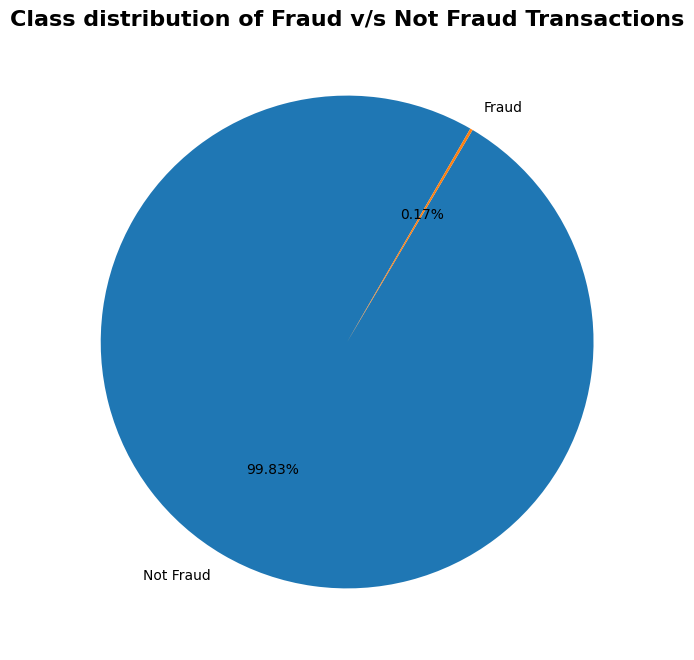

In [10]:
df['transaction_type'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=60,
    figsize=(8,8)
)
plt.ylabel('')
plt.title("Class distribution of Fraud v/s Not Fraud Transactions", fontsize=16, fontweight='bold')
plt.show()

## 3. Baseline Model

The dataset is to be standardized before training. Logistic Regression is sensitive to feature scales, and standardization ensures that features contribute proportionately, leading to better convergence and more reliable performance evaluation.

In [11]:
scaler1 = StandardScaler()

In [12]:
X = df.drop(columns=['Class', 'transaction_type'])
y = df['Class']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [13]:
print(f"Training set size: {X_train.shape[0]}\nTesting set size: {X_test.shape[0]}")

Training set size: 242085
Testing set size: 42722


In [14]:
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)

In [15]:
model1 = LogisticRegression() # without scaling (standardization), got maximum iterations reached warning

In [16]:
model1.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Not Fraud (0)', 'Fraud (1)'],
        yticklabels=['Not Fraud (0)', 'Fraud (1)']
    )
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16, fontweight='bold')
    plt.show()
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
    }
    print(f"{model_name} performance metrics")
    for name, value in metrics.items():
        print(f"{name:<10} = {value:.3f}")
    return metrics

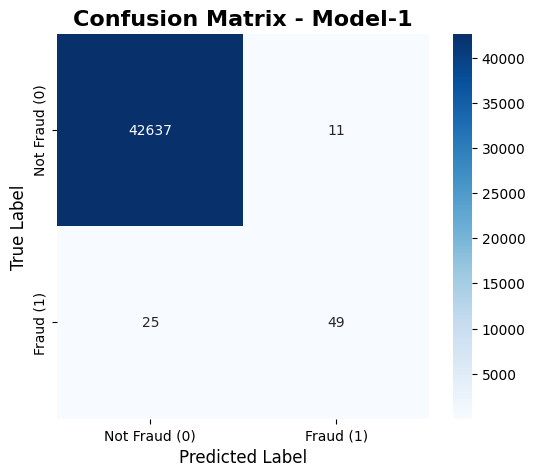

Model-1 performance metrics
Accuracy   = 0.999
Precision  = 0.817
Recall     = 0.662
F1 Score   = 0.731


In [18]:
# prediction on test set
y_pred1 = model1.predict(X_test_scaled)
model1_metrics = evaluate_model(y_test, y_pred1, model_name="Model-1")

Based on the confusion matrix and performance metrics for **Model-1**, we observe that although the model achieves high overall `accuracy`, the key metrics for the minority class (fraud cases) - `precision`, `recall`, and `f1-score` - reveal important limitations.

For example:  
+ A `recall` of **0.662** indicates that the model correctly identifies only about 6 out of every 10 actual fraud cases, while missing the remaining ones.  
+ A `precision` of **0.817** means that when the model predicts a transaction as fraud, roughly 8 out of 10 predictions are correct, while 2 are false alarms.  
+ The `f1-score`, which balances both precision and recall, provides a more reliable single measure of performance in imbalanced classification scenarios such as fraud detection.

Hence in this imbalanced scenario, `accuracy` is misleading because the dataset is dominated by non-fraudulent cases, so a model can achieve high accuracy by mostly predicting the majority class, while still failing to detect a significant portion of fraud cases.

# **B. Gaussian Mixture Model (GMM) for Synthetic Sampling**

## 1. Theoretical Foundation

- **SMOTE (Synthetic Minority Oversampling Technique)** creates synthetic data points by **interpolating** between existing minority class samples and their nearest neighbors. This is a relatively simple linear approach, which assumes that minority class samples lie in convex regions. While effective, SMOTE does not explicitly model the underlying data distribution.  

  The interpolation formula is:  
  $$
  x_{\text{new}} = x_i + \lambda (x_k - x_i), \quad \lambda \sim U(0,1)
  $$
  where:
  - $x_i$ = a randomly chosen minority sample  
  - $x_k$ = one of its $k$ nearest minority neighbors  
  - $\lambda$ = a random scalar between 0 and 1  

  This generates new points *along the line segment* between two samples.

---

- **GMM-based sampling (Gaussian Mixture Model)**, on the other hand, first **fits a probabilistic model** to the minority class by representing it as a mixture of multiple Gaussian distributions. Synthetic samples are then drawn from this fitted distribution. Instead of blindly interpolating between neighbors, GMM attempts to learn the **true density and shape** of the minority class in the feature space.  

  The GMM density is defined as:  
  $$
  p(x) = \sum_{j=1}^{K} \pi_j \, \mathcal{N}(x \mid \mu_j, \Sigma_j)
  $$
  where:
  - $K$ = number of Gaussian components  
  - $\pi_j$ = weight of the $j^{th}$ Gaussian (mixing coefficient)  
  - $\mu_j, \Sigma_j$ = mean vector and covariance matrix of component $j$  

  Synthetic samples are drawn by first selecting a component according to $\pi_j$, then sampling from the corresponding Gaussian distribution. This allows GMM to **capture multimodality and complex shapes**, unlike SMOTE.

---

#### Why GMM is *Theoretically* Better?
- **Captures complex structures:** If the minority class consists of multiple sub-groups (e.g., clusters that are far apart or have different shapes), GMM can assign separate Gaussian components to each subgroup. This allows it to generate synthetic samples that respect these natural clusters.  
- **Models non-linear boundaries:** Unlike SMOTE, which only generates samples along straight-line segments between neighbors, GMM sampling can produce points in curved or non-convex regions, following the actual probability density.  
- **Reduces noise and overlap:** Since synthetic samples are drawn from a fitted distribution, GMM is less likely to create unrealistic points in majority-class regions, which can happen with SMOTE in high-dimensional or overlapping data.

In summary, **SMOTE is simple and fast**, but assumes local linearity, while **GMM-based sampling is distribution-aware**, making it better suited for minority classes with **heterogeneous or complex structures**.


## 2. GMM Implementation

In [19]:
# let us first separate out the minority & majority class from our entire train set
mask1 = list(y_train == 1)
mask2 = list(y_train == 0)
X_minority = X_train_scaled[mask1, :]
X_majority = X_train_scaled[mask2, :]
print(f"X_majority.shape: {X_majority.shape}")
print(f"X_minority.shape: {X_minority.shape}")

X_majority.shape: (241667, 30)
X_minority.shape: (418, 30)


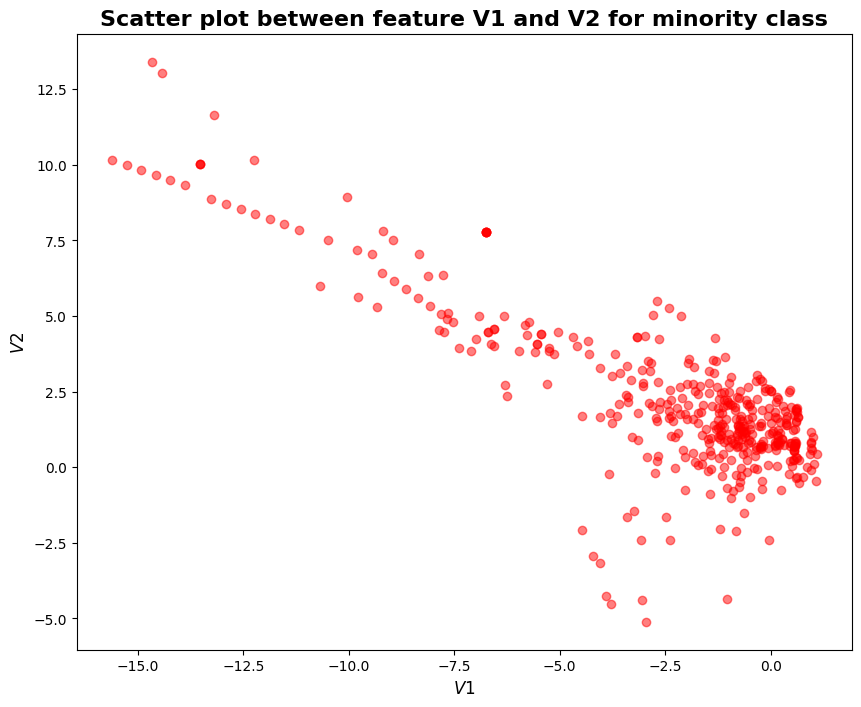

In [20]:
comp1, comp2 = 1, 2
col_names = list(df.columns)
plt.figure(figsize=(10, 8))
plt.scatter(X_minority[:, comp1], X_minority[:, comp2], c='red', alpha=0.5)
plt.title(f"Scatter plot between feature {col_names[comp1]} and {col_names[comp2]} for minority class", fontdict={"fontsize":16, "fontweight":"bold"})
plt.xlabel(f"${col_names[comp1]}$", fontsize=12)
plt.ylabel(f"${col_names[comp2]}$", fontsize=12)
plt.show()

/tmp/ipykernel_468/1471037051.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(


<Figure size 1000x800 with 0 Axes>

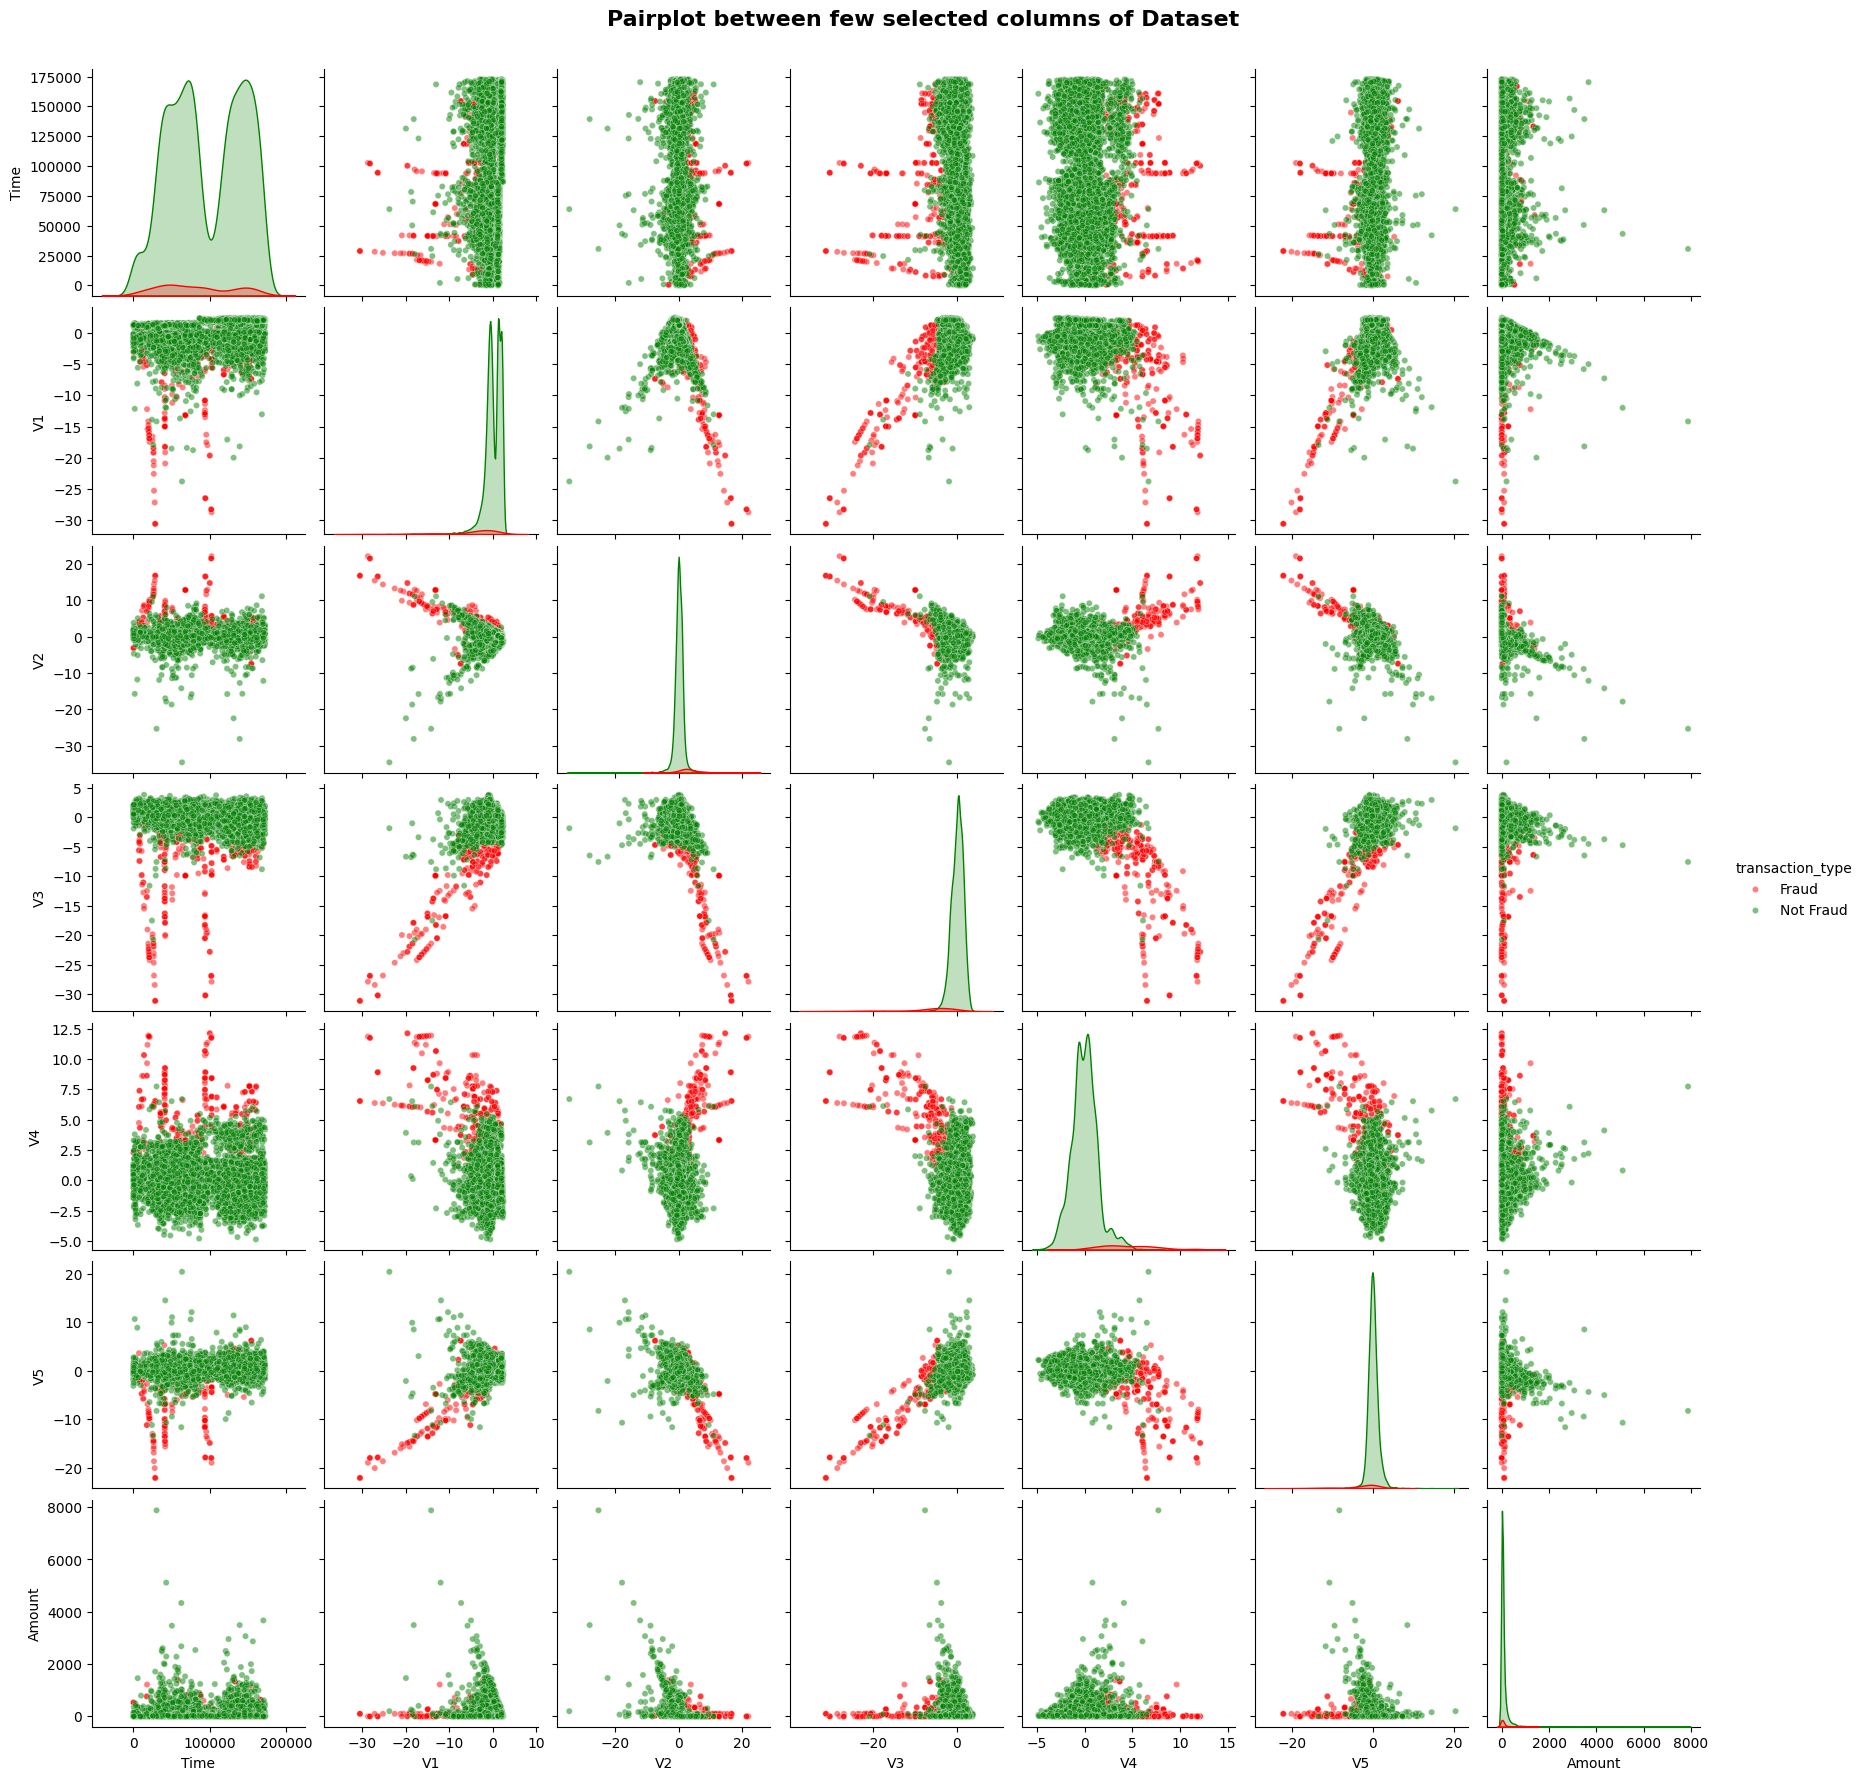

In [21]:
# Create pairplot
plt.figure(figsize=(10, 8))

df_sampled = ( # we need a sampled down dataset for running pairplot quickly
    df.groupby("transaction_type", group_keys=False)
      .apply(lambda x: x.sample(
          frac=0.03 if x.name == "Not Fraud" else 0.9,  # oversample Fraud
          replace=True, 
          random_state=42
      ))
)

sns.pairplot(
    df_sampled,
    vars=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount'],
    hue='transaction_type',
    palette={'Fraud': 'red', 'Not Fraud': 'green'},
    diag_kind='kde',   # KDE on the diagonal
    plot_kws={'alpha': 0.5, 's': 20}  # smaller, transparent points
)

plt.suptitle("Pairplot between few selected columns of Dataset", y=1.02, fontsize=16, fontweight='bold')
plt.show()

This seems like a "not-so-simple" dataset.  
Let us say we fit a GMM on minority class and then generate synthetic minority samples from it, it might happen that the generated point might end-up nearer to a majority sample.  
And due to this the model might get confused i.e. synthetic data essentially says, "These points that look exactly like normal transactions, are actually fraud."

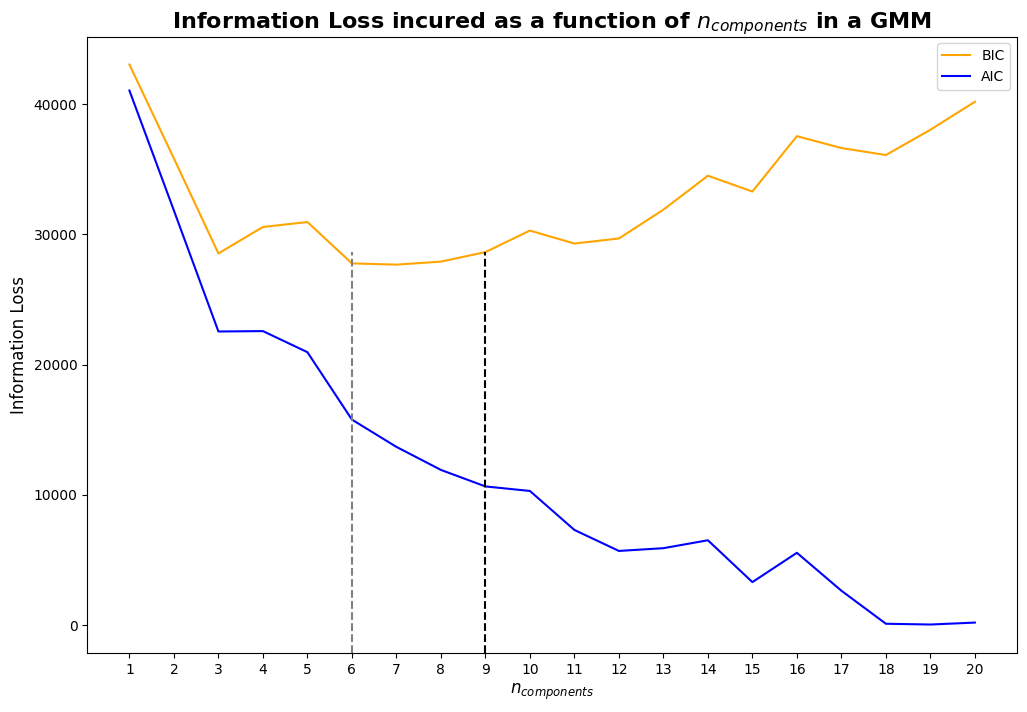

In [22]:
# let us try to find to optimal number of components for fitting our GMM
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_minority)
          for n in n_components]
plt.figure(figsize=(12, 8))
plt.plot(n_components, [m.bic(X_minority) for m in models], label='BIC', color='orange')
plt.plot(n_components, [m.aic(X_minority) for m in models], label='AIC', color='blue')
plt.legend(loc='best')
plt.xlabel('$n_{components}$', fontsize=12)
plt.ylabel('Information Loss', fontsize=12)
plt.axvline(x=6, linestyle='--', color='gray', ymax=0.65)
plt.axvline(x=9, linestyle='--', color='black', ymax=0.65)
plt.title('Information Loss incured as a function of $n_{components}$ in a GMM', fontsize=16, fontweight="bold")
plt.xticks(n_components)
plt.show()

While the **AIC** will keep dropping, we can balance the value of `n_components` weighing both **AIC** and **BIC**.  
This leads to `n_components = 9` as good choice, since increasing `n_components` from `6` to `9`, gave us drop in **AIC** but only marginal increase in **BIC**.  
Let us also try for `n_components = 3`.

In [21]:
gmm3 = GaussianMixture(n_components=3, max_iter=500, random_state=42)
gmm3.fit(X_minority)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [22]:
# let us fit our GMM
gmm9 = GaussianMixture(n_components=9, max_iter=500, random_state=42)
gmm9.fit(X_minority)

,n_components,9
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [23]:
# borrowing these utility functions from lab session jupyter notebooks
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(0, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    ax.set_title("Clustered data points by Gaussian Mixture", fontsize=16, fontweight="bold")
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)

    w_factor = 0.5 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

```python
# column names in the dataset
col_names = list(df.columns)
print(col_names)
>>> ['Time', 'V1', 'V2', 'V3', ... , 'V27', 'V28', 'Amount', 'Class']
```

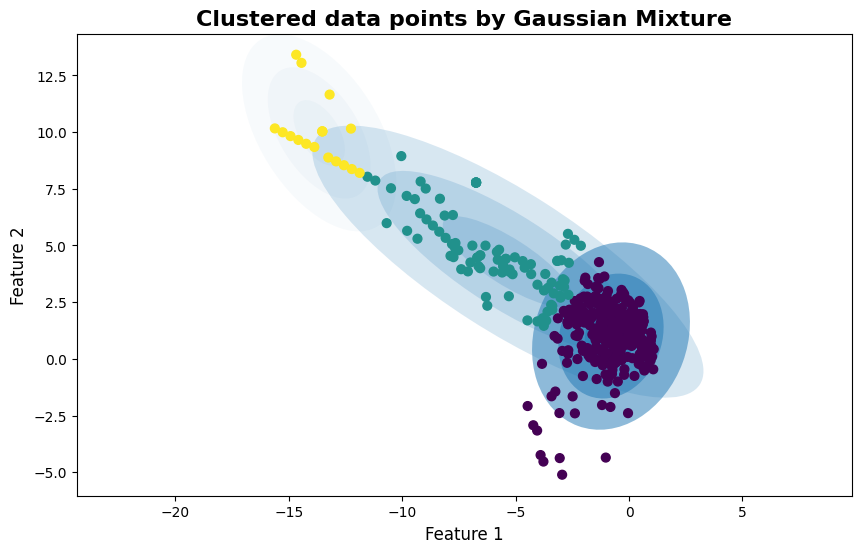

In [54]:
col_names = list(df.columns) # in above list, V1 to V28 is the data projected on top-28 PCs of the original dataset (whose access we do not have)
plt.figure(figsize=(10, 6))
plot_gmm(gmm3, X_minority[:, 1:3], label=True) # for n_components=3

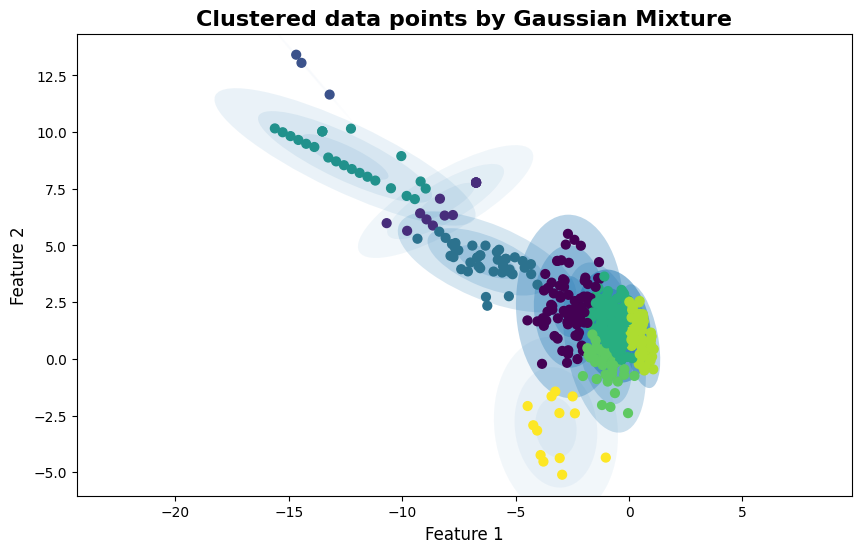

In [41]:
col_names = list(df.columns) # in above list, V1 to V28 is the data projected on top-28 PCs of the original dataset (whose access we do not have)
plt.figure(figsize=(10, 6))
plot_gmm(gmm9, X_minority[:, 1:3], label=True) # for n_components=9

## 3. Synthetic Data Generation

In [28]:
gmm9 = GaussianMixture(n_components=9, max_iter=500, random_state=42)
gmm9.fit(X_minority)

,n_components,9
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [25]:
X_minority_sampled, _ = gmm9.sample(10_000)

In [26]:
X_minority_sampled.shape

(10000, 30)

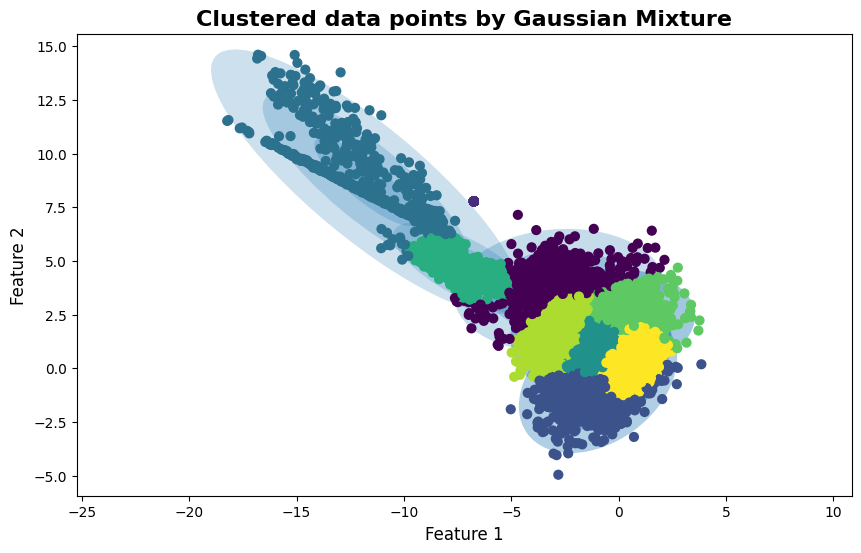

In [27]:
plt.figure(figsize=(10, 6))
plot_gmm(gmm9, X_minority_sampled[:, 1:3], label=True)

Let us try to upsample minority class using GMM.

In [23]:
remaining = len(X_majority) - len(X_minority)
print(remaining)
X_minority_upsampled, _ = gmm9.sample(remaining)

241249


In [24]:
minority_class = 1
X_train_gmm, y_train_gmm = np.vstack((X_train_scaled, X_minority_upsampled)), np.hstack((y_train, np.array([minority_class]*remaining)))

In [25]:
print("Original dataset shape:", collections.Counter(y_train))
print("Upsampled dataset shape:", collections.Counter(y_train_gmm.tolist()))

Original dataset shape: Counter({0: 241667, 1: 418})
Upsampled dataset shape: Counter({0: 241667, 1: 241667})


## 4. Rebalancing with Clustering-Based Undersampling (CBU)

#### a. **Working of `CBU`**
+ Instead of randomly throwing away majority samples, Clustering-Based Undersampling groups the majority class into clusters (using K-Means or similar). Then, it replaces the cluster with its centroid or representative samples.
+ This ensures the reduced dataset preserves diversity of the original majority distribution while cutting down size. It avoids bias from removing too many points from dense regions.

Process:

1. Cluster the majority class only.
2. Select samples from clusters (e.g., cluster centroids) so that the new majority set is smaller but still representative.
3. Combine with all minority class samples to form a balanced dataset.
---
#### b. **Working of `ClusterCentroids`**
Undersample by generating centroids based on clustering methods (using `ClusterCentroids`)  

+ `ClusterCentroids` is an undersampling technique that reduces the size of the majority class while trying to preserve its overall distribution.
+ Instead of randomly dropping samples, it applies the KMeans clustering algorithm to the majority class. You first choose a target number of majority samples (say equal to the number of minority samples).
+ Then, KMeans is run with that many clusters on the majority class. The cluster centroids (i.e., the geometric centers of each cluster) are then used to represent the entire cluster.

In this way, a large set of majority points is compressed into a smaller, representative set. This helps retain the global structure of the majority class while eliminating redundancy and avoiding the biases of purely random undersampling.


### Approach to create a balanced dataset using CBU-based downsampling for majority class, and GMM-based upsampling for minority class

We know that we have only `~400` minority samples, and then if we try to _sample_ a very large number number of minority samples from our **GMM** to match the count of majority class we are at a risk of _generating_ unrealistic or noisy minority samples.  
So we must down-sample our majority class to a quite small number, so that during upsampling from GMM we do not run to the mentioned risk.

Process:

1. Decide the downsample size for majority class. 
2. As `ClusterCentroids` has a parameter `sampling_strategy` which can be used to achieve this.
   $$ sampling\_\space strategy = N_{minority} / N_{majority \space \space after \space \space resampling} $$
    e.g.: $N_{minority} = 400$; $N_{majority} = 2,00,000$; if we want $5000$ majority samples (i.e. $N_{majority \space \space after \space \space resampling}$ is $5000$), we can define `sampling_strategy` as $400/5000$.
3. Now we can sample $N'$ samples from GMM to match the count of majority class; such that $N'$ = $N_{majority \space \space after \space \space resampling}$ - $N_{minority}$.

In [26]:
from sklearn.cluster import MiniBatchKMeans
def balance_dataset(X, y, gmm_model, n_majority_after_resampling = 200, minority_class = 1):
    print("Original dataset shape:", collections.Counter(y))
    n_minority = len(X_minority)
    sampling_strategy = n_minority / n_majority_after_resampling
    print("Running CBU, can take a while...")
    cbu = ClusterCentroids(sampling_strategy=sampling_strategy, estimator=MiniBatchKMeans(n_clusters=n_majority_after_resampling, batch_size=2048, random_state=16), random_state=16,)
    X_train_cbu, y_train_cbu = cbu.fit_resample(X, y)
    print("CBU Resampled dataset shape:", collections.Counter(y_train_cbu))
    n_dash = n_majority_after_resampling - n_minority
    print(f"Sampling remaining {n_dash} minority samples from GMM...")
    X_minority_sampled, _ = gmm_model.sample(n_dash)
    X_train_balanced, y_train_balanced = np.vstack((X_train_cbu, X_minority_sampled)), np.hstack((y_train_cbu, np.array([minority_class]*n_dash)))
    print("Balanced dataset shape:", collections.Counter(y_train_balanced.tolist()), "\n")
    return X_train_balanced, y_train_balanced


In [27]:
def get_best_sample_size(func, samples, X_train, y_train, X_test, y_test, gmm_fitted):
    metrics = {}
    for sample in samples:
        model = LogisticRegression()
        X_train_balanced, y_train_balanced = func(X_train, y_train, gmm_fitted, n_majority_after_resampling=sample)
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)
        metric = evaluate_model(y_test, y_pred, model_name="Model-2")
        print('\n\n')
        metrics[sample] = metric
    return metrics

In [34]:
gmm3 = GaussianMixture(n_components=3, max_iter=500, random_state=42)
gmm3.fit(X_minority)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [35]:
gmm9 = GaussianMixture(n_components=9, max_iter=500, random_state=42)
gmm9.fit(X_minority)

,n_components,9
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 2000, 1: 418})
Sampling remaining 1582 minority samples from GMM...
Balanced dataset shape: Counter({0: 2000, 1: 2000}) 



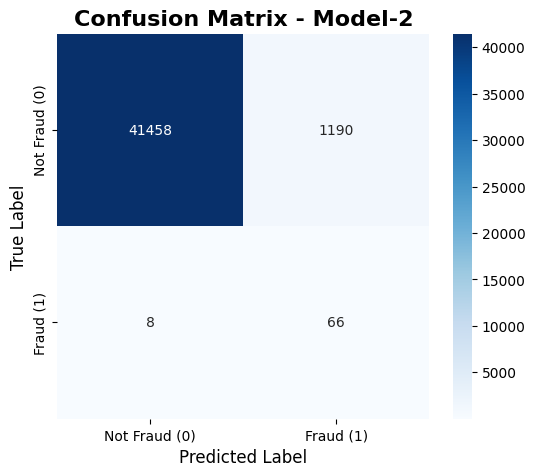

Model-2 performance metrics
Accuracy   = 0.972
Precision  = 0.053
Recall     = 0.892
F1 Score   = 0.099



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 4000, 1: 418})
Sampling remaining 3582 minority samples from GMM...
Balanced dataset shape: Counter({0: 4000, 1: 4000}) 



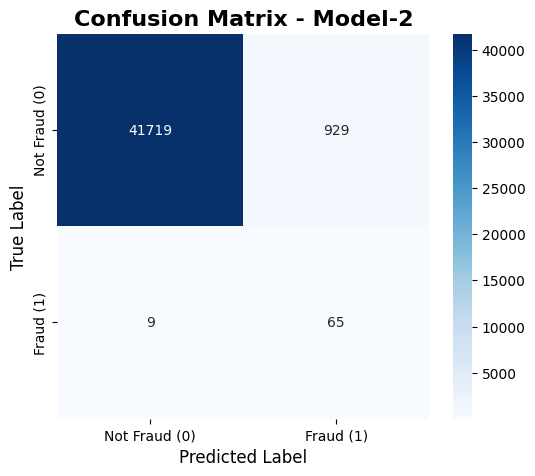

Model-2 performance metrics
Accuracy   = 0.978
Precision  = 0.065
Recall     = 0.878
F1 Score   = 0.122



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 5000, 1: 418})
Sampling remaining 4582 minority samples from GMM...
Balanced dataset shape: Counter({0: 5000, 1: 5000}) 



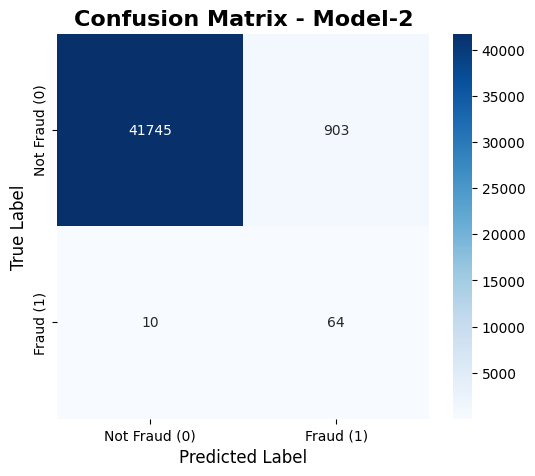

Model-2 performance metrics
Accuracy   = 0.979
Precision  = 0.066
Recall     = 0.865
F1 Score   = 0.123



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 5500, 1: 418})
Sampling remaining 5082 minority samples from GMM...
Balanced dataset shape: Counter({0: 5500, 1: 5500}) 



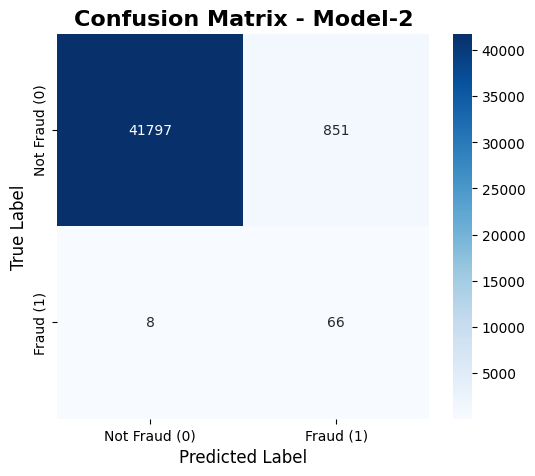

Model-2 performance metrics
Accuracy   = 0.980
Precision  = 0.072
Recall     = 0.892
F1 Score   = 0.133



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 6000, 1: 418})
Sampling remaining 5582 minority samples from GMM...
Balanced dataset shape: Counter({0: 6000, 1: 6000}) 



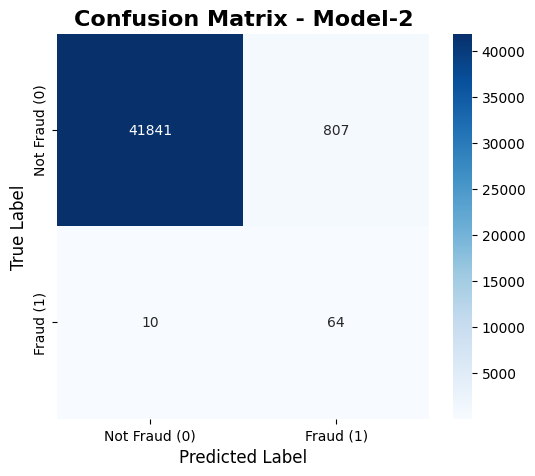

Model-2 performance metrics
Accuracy   = 0.981
Precision  = 0.073
Recall     = 0.865
F1 Score   = 0.135



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 6500, 1: 418})
Sampling remaining 6082 minority samples from GMM...
Balanced dataset shape: Counter({0: 6500, 1: 6500}) 



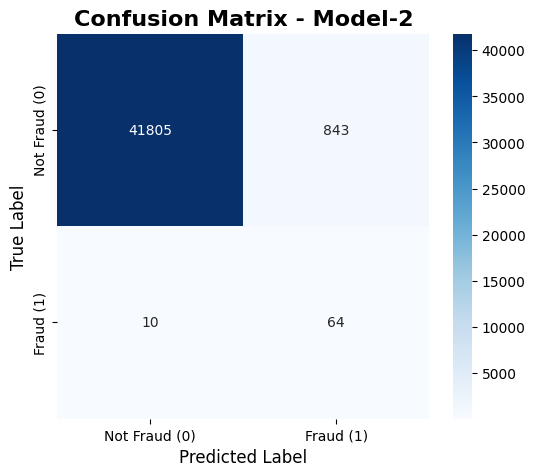

Model-2 performance metrics
Accuracy   = 0.980
Precision  = 0.071
Recall     = 0.865
F1 Score   = 0.130



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 7000, 1: 418})
Sampling remaining 6582 minority samples from GMM...
Balanced dataset shape: Counter({0: 7000, 1: 7000}) 



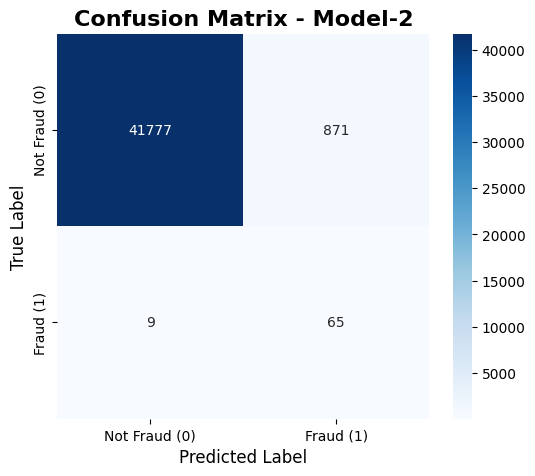

Model-2 performance metrics
Accuracy   = 0.979
Precision  = 0.069
Recall     = 0.878
F1 Score   = 0.129



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 8000, 1: 418})
Sampling remaining 7582 minority samples from GMM...
Balanced dataset shape: Counter({0: 8000, 1: 8000}) 



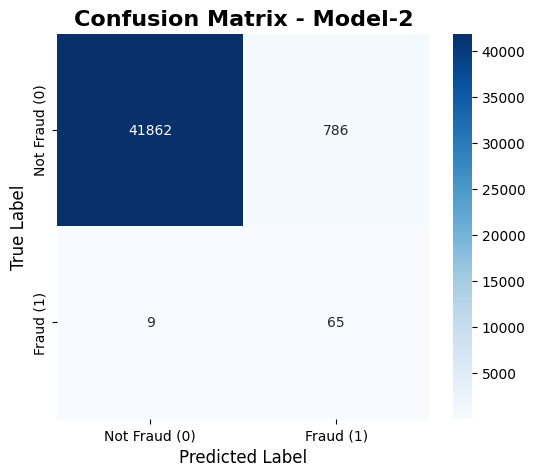

Model-2 performance metrics
Accuracy   = 0.981
Precision  = 0.076
Recall     = 0.878
F1 Score   = 0.141



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 9000, 1: 418})
Sampling remaining 8582 minority samples from GMM...
Balanced dataset shape: Counter({0: 9000, 1: 9000}) 



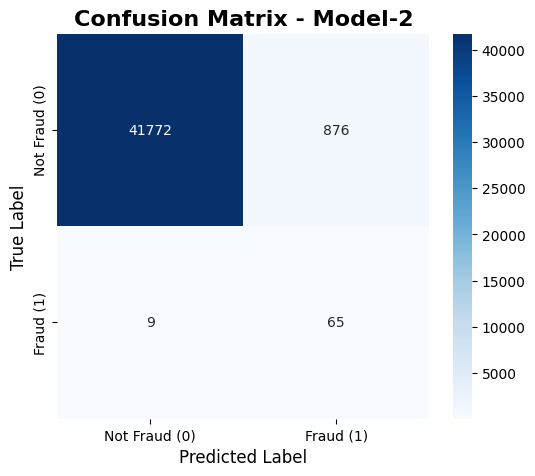

Model-2 performance metrics
Accuracy   = 0.979
Precision  = 0.069
Recall     = 0.878
F1 Score   = 0.128



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 10000, 1: 418})
Sampling remaining 9582 minority samples from GMM...
Balanced dataset shape: Counter({0: 10000, 1: 10000}) 



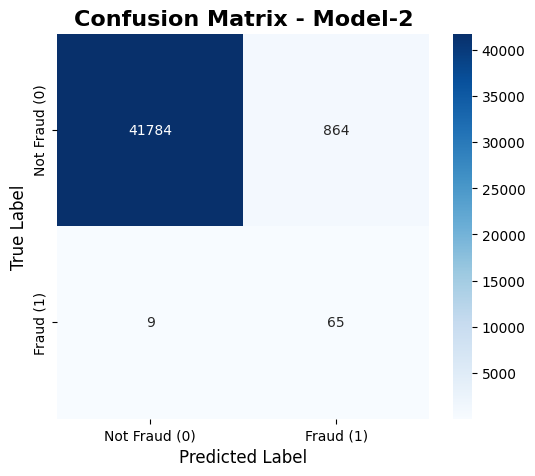

Model-2 performance metrics
Accuracy   = 0.980
Precision  = 0.070
Recall     = 0.878
F1 Score   = 0.130



CPU times: user 1h 25s, sys: 1.4 s, total: 1h 26s
Wall time: 5min 9s


In [59]:
%%time
samples = [2000, 4000, 5000, 5500, 6000, 6500, 7000, 8000, 9000, 10_000]
metrics9 = get_best_sample_size(balance_dataset, samples, X_train_scaled, y_train, X_test_scaled, y_test, gmm9)

In [60]:
best_sample_size9 = None
best_precision9 = -1
for sample_size, metric in metrics9.items():
    curr_precision = metric["Precision"]
    if curr_precision > best_precision9:
        best_sample_size9 = sample_size
        best_precision9 = curr_precision
print(f"For n_components=9, Best precision: {round(best_precision9, 4)} for maj. sample size: {best_sample_size9}")

For n_components=9, Best precision: 0.0764 for maj. sample size: 8000


Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 2000, 1: 418})
Sampling remaining 1582 minority samples from GMM...
Balanced dataset shape: Counter({0: 2000, 1: 2000}) 



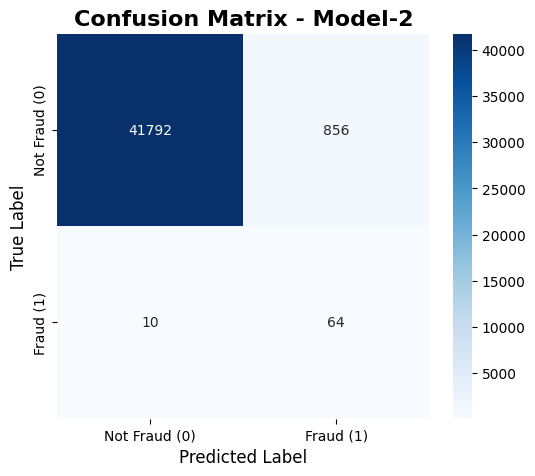

Model-2 performance metrics
Accuracy   = 0.980
Precision  = 0.070
Recall     = 0.865
F1 Score   = 0.129



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 4000, 1: 418})
Sampling remaining 3582 minority samples from GMM...
Balanced dataset shape: Counter({0: 4000, 1: 4000}) 



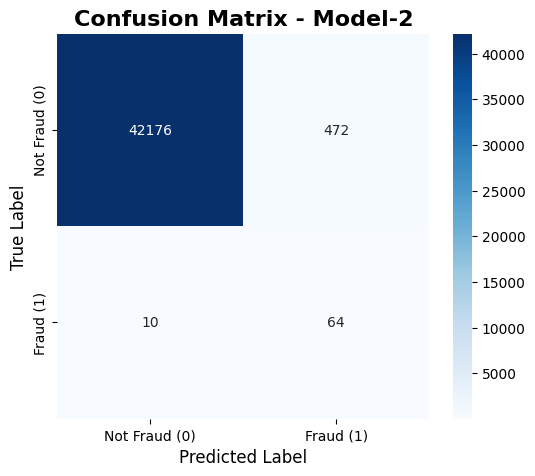

Model-2 performance metrics
Accuracy   = 0.989
Precision  = 0.119
Recall     = 0.865
F1 Score   = 0.210



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 5000, 1: 418})
Sampling remaining 4582 minority samples from GMM...
Balanced dataset shape: Counter({0: 5000, 1: 5000}) 



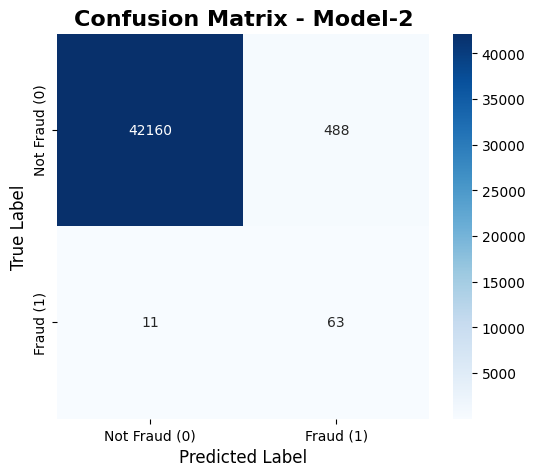

Model-2 performance metrics
Accuracy   = 0.988
Precision  = 0.114
Recall     = 0.851
F1 Score   = 0.202



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 5500, 1: 418})
Sampling remaining 5082 minority samples from GMM...
Balanced dataset shape: Counter({0: 5500, 1: 5500}) 



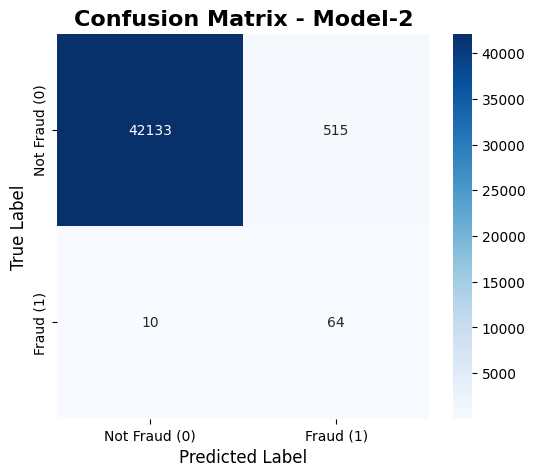

Model-2 performance metrics
Accuracy   = 0.988
Precision  = 0.111
Recall     = 0.865
F1 Score   = 0.196



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 6000, 1: 418})
Sampling remaining 5582 minority samples from GMM...
Balanced dataset shape: Counter({0: 6000, 1: 6000}) 



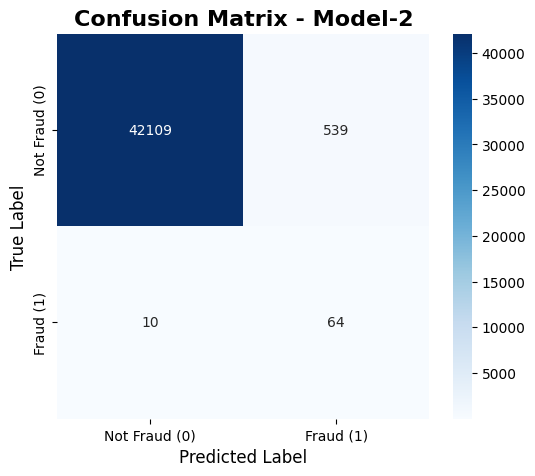

Model-2 performance metrics
Accuracy   = 0.987
Precision  = 0.106
Recall     = 0.865
F1 Score   = 0.189



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 6500, 1: 418})
Sampling remaining 6082 minority samples from GMM...
Balanced dataset shape: Counter({0: 6500, 1: 6500}) 



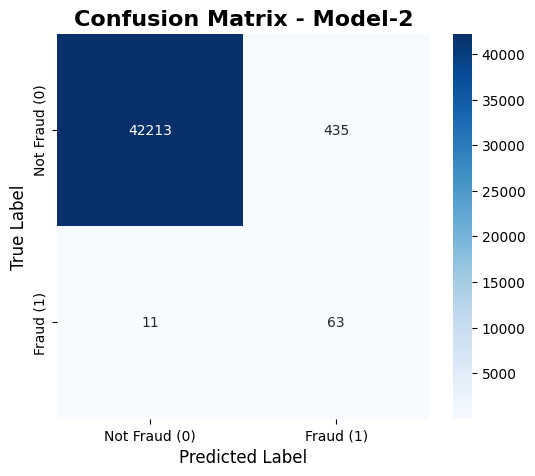

Model-2 performance metrics
Accuracy   = 0.990
Precision  = 0.127
Recall     = 0.851
F1 Score   = 0.220



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 7000, 1: 418})
Sampling remaining 6582 minority samples from GMM...
Balanced dataset shape: Counter({0: 7000, 1: 7000}) 



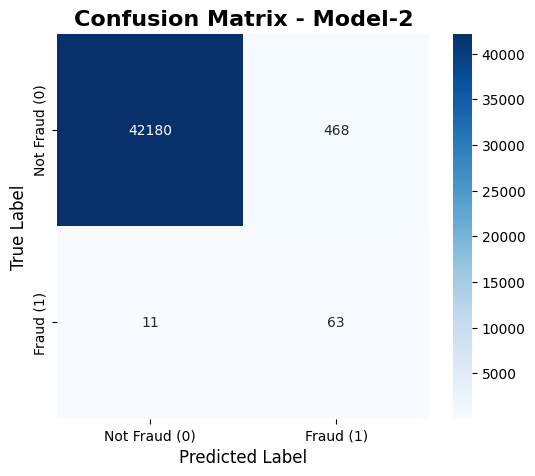

Model-2 performance metrics
Accuracy   = 0.989
Precision  = 0.119
Recall     = 0.851
F1 Score   = 0.208



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 8000, 1: 418})
Sampling remaining 7582 minority samples from GMM...
Balanced dataset shape: Counter({0: 8000, 1: 8000}) 



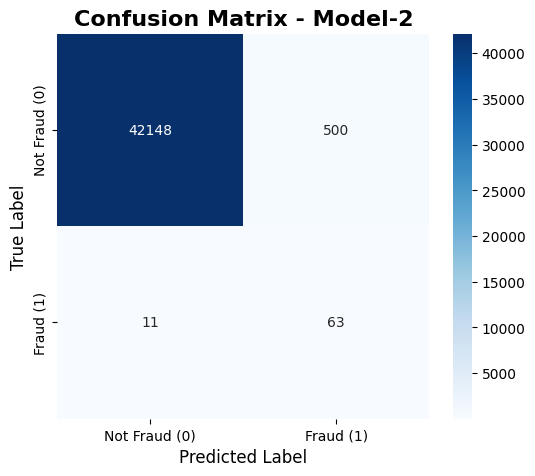

Model-2 performance metrics
Accuracy   = 0.988
Precision  = 0.112
Recall     = 0.851
F1 Score   = 0.198



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 9000, 1: 418})
Sampling remaining 8582 minority samples from GMM...
Balanced dataset shape: Counter({0: 9000, 1: 9000}) 



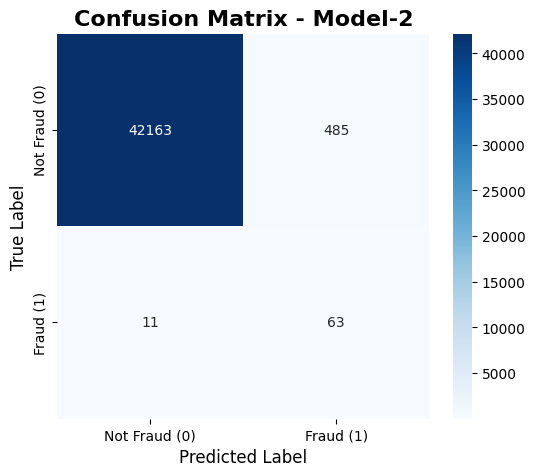

Model-2 performance metrics
Accuracy   = 0.988
Precision  = 0.115
Recall     = 0.851
F1 Score   = 0.203



Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 10000, 1: 418})
Sampling remaining 9582 minority samples from GMM...
Balanced dataset shape: Counter({0: 10000, 1: 10000}) 



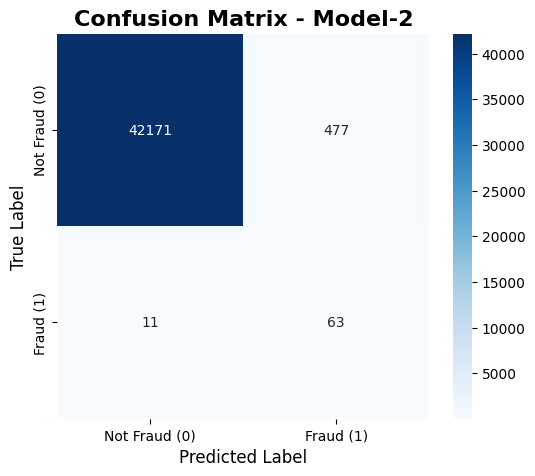

Model-2 performance metrics
Accuracy   = 0.989
Precision  = 0.117
Recall     = 0.851
F1 Score   = 0.205



CPU times: user 1h 1min 57s, sys: 1.6 s, total: 1h 1min 58s
Wall time: 5min 16s


In [61]:
%%time
samples = [2000, 4000, 5000, 5500, 6000, 6500, 7000, 8000, 9000, 10_000]
metrics3 = get_best_sample_size(balance_dataset, samples, X_train_scaled, y_train, X_test_scaled, y_test, gmm3)

In [62]:
best_sample_size3 = None
best_precision3 = -1
for sample_size, metric in metrics3.items():
    curr_precision = metric["Precision"]
    if curr_precision > best_precision3:
        best_sample_size3 = sample_size
        best_precision3 = curr_precision
print(f"For n_components=3, Best precision: {round(best_precision3, 4)} for maj. sample size: {best_sample_size3}")

For n_components=3, Best precision: 0.1265 for maj. sample size: 6500


Let us pick the best of the models, i.e. GMM with `n_components = 3` and `majority_sample_size_after_resampling = 6500`.

In [28]:
best_sample_size3=6500

In [29]:
%%time
X_train_balanced, y_train_balanced = balance_dataset(X_train_scaled, y_train, gmm3, n_majority_after_resampling=best_sample_size3)

Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 6500, 1: 418})
Sampling remaining 6082 minority samples from GMM...
Balanced dataset shape: Counter({0: 6500, 1: 6500}) 

CPU times: user 5min 41s, sys: 432 ms, total: 5min 41s
Wall time: 28.7 s


# **C. Model Comparison and Analysis**

Notice the important point: this choice of number of components measures how well a GMM works as a density estimator, not how well it works as a clustering algorithm. I'd encourage you to think of the GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets.

## 1. Model Training and Evaluation

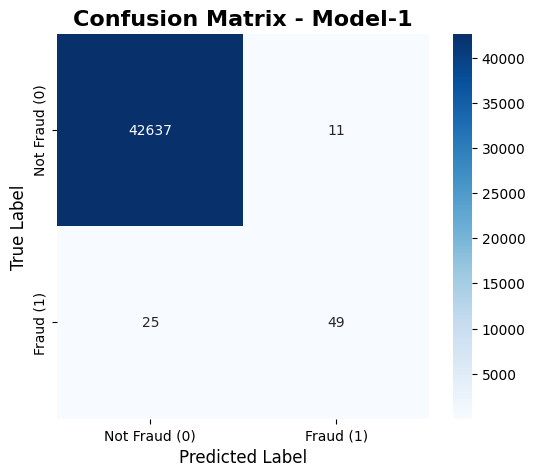

Model-1 performance metrics
Accuracy   = 0.999
Precision  = 0.817
Recall     = 0.662
F1 Score   = 0.731


In [64]:
model1_metrics = evaluate_model(y_test, y_pred1, model_name="Model-1")

Best threshold by Youden's J: 0.0219
TPR: 0.8514, FPR: 0.0011


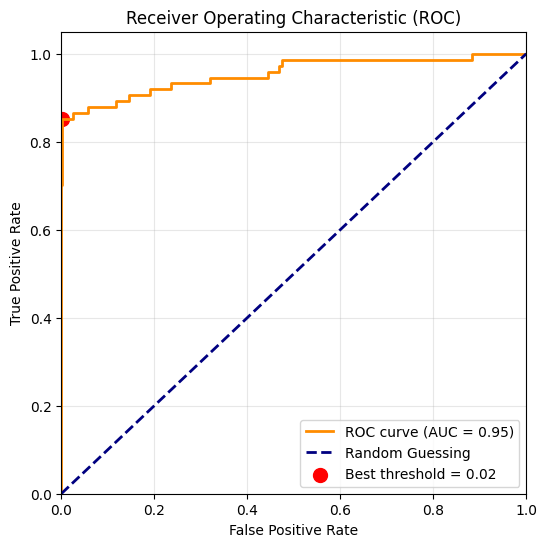

In [42]:
y_proba1 = model1.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_proba1[:, 1])
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold by Youden's J: {best_threshold:.4f}")
print(f"TPR: {tpr[best_idx]:.4f}, FPR: {fpr[best_idx]:.4f}")

# Plot ROC and mark the best threshold
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guessing")

# Mark the best point
plt.scatter(fpr[best_idx], tpr[best_idx], color="red", s=100,
            label=f"Best threshold = {best_threshold:.2f}")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

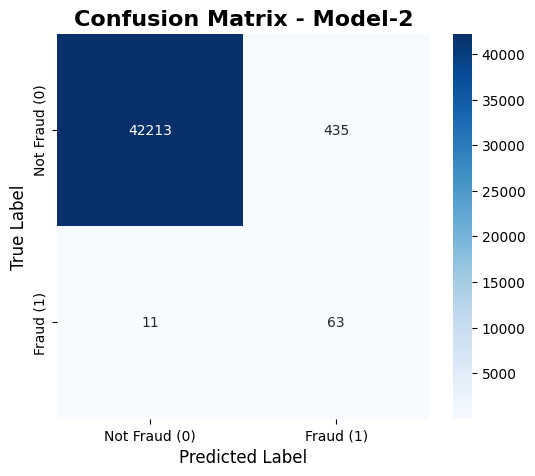

Model-2 performance metrics
Accuracy   = 0.990
Precision  = 0.127
Recall     = 0.851
F1 Score   = 0.220


In [35]:
model2 = LogisticRegression()
model2.fit(X_train_balanced, y_train_balanced)
y_pred2 = model2.predict(X_test_scaled)
model2_metrics = evaluate_model(y_test, y_pred2, model_name="Model-2")

Best threshold by Youden's J: 0.3697
TPR: 0.8784, FPR: 0.0247


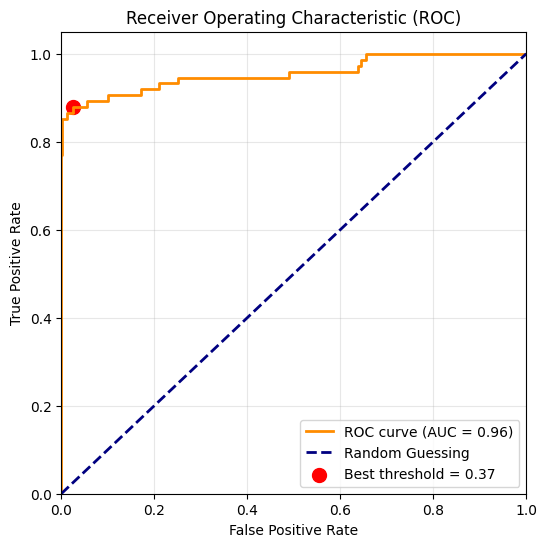

In [41]:
y_proba2 = model2.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_proba2[:, 1])
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold by Youden's J: {best_threshold:.4f}")
print(f"TPR: {tpr[best_idx]:.4f}, FPR: {fpr[best_idx]:.4f}")

# Plot ROC and mark the best threshold
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guessing")

# Mark the best point
plt.scatter(fpr[best_idx], tpr[best_idx], color="red", s=100,
            label=f"Best threshold = {best_threshold:.2f}")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

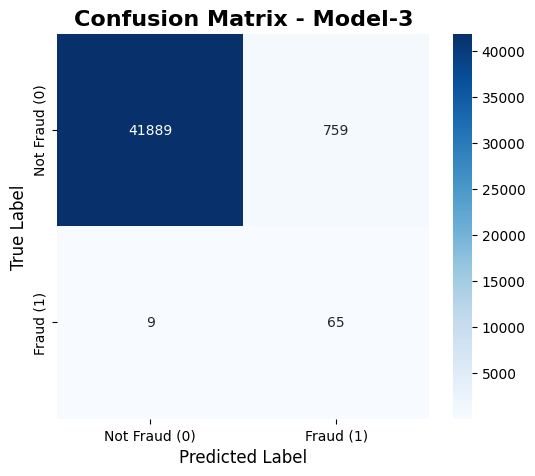

Model-3 performance metrics
Accuracy   = 0.982
Precision  = 0.079
Recall     = 0.878
F1 Score   = 0.145


In [37]:
model3 = LogisticRegression()
model3.fit(X_train_gmm, y_train_gmm)
y_pred3 = model3.predict(X_test_scaled)
model3_metrics = evaluate_model(y_test, y_pred3, model_name="Model-3")

Best threshold by Youden's J: 0.4615
TPR: 0.8919, FPR: 0.0212


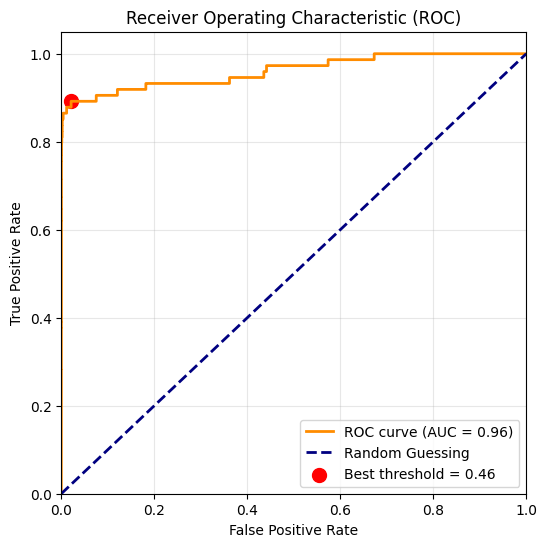

In [40]:
y_proba3 = model3.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_proba3[:, 1])
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold by Youden's J: {best_threshold:.4f}")
print(f"TPR: {tpr[best_idx]:.4f}, FPR: {fpr[best_idx]:.4f}")

# Plot ROC and mark the best threshold
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guessing")

# Mark the best point
plt.scatter(fpr[best_idx], tpr[best_idx], color="red", s=100,
            label=f"Best threshold = {best_threshold:.2f}")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 2. Comparative Analysis

In [43]:
metrics_all = [model1_metrics, model2_metrics, model3_metrics]
names = ["Baseline", "GMM+CBU based", "GMM based"]
for i, metric in enumerate(metrics_all):
    metric['Model'] = names[i]

In [44]:
metrics_df = pd.DataFrame(metrics_all)
metrics_df.set_index('Model', inplace=True)

In [45]:
metrics_df = metrics_df.drop(columns=["Accuracy"])
metrics_df

,Precision,Recall,F1 Score
Model,,,
Baseline,0.816667,0.662162,0.731343
GMM+CBU based,0.126506,0.851351,0.220280
GMM based,0.078883,0.878378,0.144766


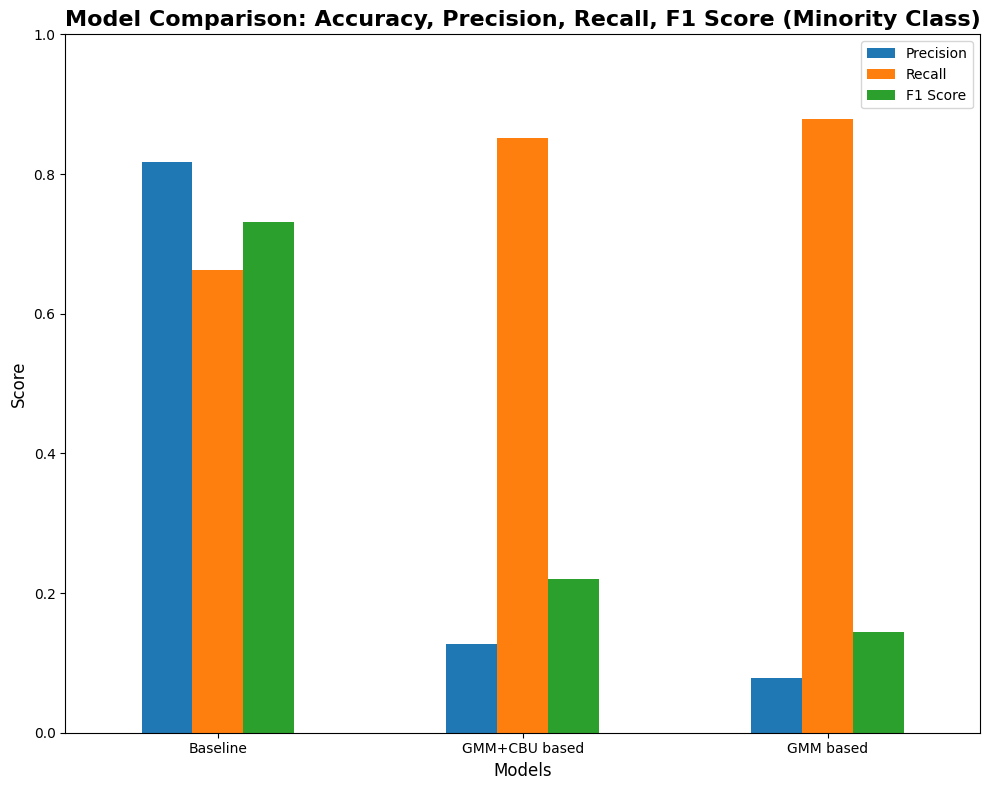

In [46]:
metrics_df.plot(kind='bar', figsize=(10, 8))
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score (Minority Class)', fontdict={"fontsize":16, "fontweight":"bold"})
plt.ylabel('Score', fontdict={"fontsize":12})
plt.xlabel('Models', fontdict={"fontsize":12})
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig('model_comparison.png')
plt.show()

As we can see, the GMM-based sampling did help to identify the minority class as compared with baseline model. But at a cost of reduced precision and F1-score.

<!-- ## 3. Final Recommendation

---

### Benefits and Drawbacks of Each Method

1.  **Baseline (Imbalanced):**
    * **Benefits:** Delivers the strongest balance with the highest **precision (0.82)** and highest **F1-score (0.73)**. This means fewer false alarms and more reliable predictions overall.
    * **Drawbacks:** **Recall is modest (0.66)**, so a significant number of fraud cases are still missed.

2.  **GMM-based Sampling:**
    * **Benefits:** **Recall shoots up to 0.85**, successfully capturing almost all fraud cases.
    * **Drawbacks:** **Precision collapses to 0.03**, making 97% of flagged transactions false positives. The **F1-score (0.06)** is extremely poor.

---

### Which Method Performed Best and Why

* **The Baseline model clearly performed best overall**, achieving the highest precision and F1-score while maintaining reasonable recall.
* The GMM-based resampling method helped in improving the recall, but it could not keep up with precision and F1-score. A reason could be that we are upsampling the minority class from a GMM trained on only 400 samples, and on top of that, we also aggressively downsampled from the majority class.

---

### Challenge: Generating Data from a Small Sample

Given a small set of minority class samples (e.g., ~400 data points), training a Gaussian Mixture Model (GMM) and using it to generate a very large number of new samples presents a significant risk. The primary concern is **overfitting**, where the GMM learns the specific noise and artifacts of the small training set rather than the true underlying data distribution.

Consequently, the synthetic data generated by the GMM might be:
* **Noisy:** Amplifying random patterns from the original 400 samples.
* **Unrealistic:** Lacking the diversity of the true minority class.
* **Redundant:** Creating many near-identical copies of the original data points.

The proposed solution of **aggressive majority downsampling** was considered to mitigate this. While well-intentioned, this approach is **not recommended** because it creates a new, often more severe, problem:
* **The Flaw (Information Loss):** By severely down-sampling the majority class, you discard a vast amount of valuable information. Your model loses the opportunity to learn the rich patterns and variations within the majority class, which is crucial for distinguishing between the two classes. This often leads to a model that is less accurate and generalizes poorly to new data.

---

### Recommendation: A More Balanced Strategy

A better approach is to combine **moderate down-sampling with moderate up-sampling**.

1.  **Down-sample the majority class** to a more reasonable level, not necessarily to match the minority count. For example, you could aim for a **2:1 or 3:1 ratio** of majority to minority samples. This preserves more information.
2.  **Train the GMM** on the original ~400 minority samples.
3.  **Upsample the minority class** using the GMM to match the new, moderately-reduced majority class count.

This hybrid approach strikes a better balance: it addresses the class imbalance without discarding excessive amounts of crucial data from the majority class, and it avoids creating an unrealistically large synthetic dataset from a small sample. -->

## 3. Final Recommendation


### Benefits and Drawbacks of Each Method

1. **Baseline (Imbalanced):**

   * **Benefits:** Achieves the strongest balance with the highest **precision (0.82)** and highest **F1-score (0.73)**. This means fewer false alarms and more reliable predictions overall.
   * **Drawbacks:** **Recall is modest (0.66)**, so a significant number of fraud cases are still missed.

2. **GMM + CBU Sampling:**

   * **Benefits:** **Recall increases to 0.85**, successfully capturing most fraud cases.
   * **Drawbacks:** **Precision collapses to 0.127**, meaning 90% of flagged transactions are false alarms. The **F1-score (0.22)** is poor.
   * **Key Issue:** Since the GMM was trained on only \~400 minority samples, many of the synthetic fraud points end up **close to genuine normal transactions**. This confuses the model, as it effectively learns that “points that look just like normal transactions might actually be fraud.” The result is a flood of false positives.

3. **GMM based:**

   * **Benefits:** **Recall increases to 0.88**, successfully capturing most fraud cases.
   * **Drawbacks:** **Precision collapses to 0.07**, meaning 93% of flagged transactions are false alarms. The **F1-score (0.14)** is poor.
   * **Key Issue:** Since the GMM was trained on only \~400 minority samples, many of the synthetic fraud points end up **close to genuine normal transactions**. This confuses the model, as it effectively learns that “points that look just like normal transactions might actually be fraud.” The result is a flood of false positives.

---

### Which Method Performed Best and Why

* **The Baseline model clearly performed best overall**, achieving the highest precision and F1-score while still maintaining reasonable recall.
* The GMM-based resampling improved recall but completely failed to maintain usable precision and F1. This is not just due to aggressive resampling, but also because the **synthetic fraud samples overlapped with the majority distribution**, making the decision boundary blurrier instead of clearer.

---

### Challenge: Generating Data from a Small Sample

Given a small set of minority class samples (\~400 points), training a Gaussian Mixture Model (GMM) to generate large amounts of new data has multiple risks:

* **Overfitting:** The GMM memorizes the small sample’s quirks instead of learning a general fraud distribution.
* **Overlap:** Synthetic fraud points often land in regions dominated by normal transactions, misleading the model.
* **Redundancy:** Many generated points resemble near-duplicates of the original minority data.

While majority downsampling was attempted to balance the classes, the aggressive reduction introduced its own major flaw:

* **Information Loss:** Discarding large portions of the majority class destroys useful variability and makes the model blind to many normal patterns, reducing generalization.

---

### Recommendation: A More Balanced Strategy

A better approach is to combine **moderate down-sampling with moderate up-sampling**, while being careful about synthetic sample quality:

1. **Moderately down-sample the majority class** (e.g., target a 2:1 or 3:1 majority-to-minority ratio). This preserves important normal patterns while addressing extreme imbalance.
2. **Validate synthetic data** by checking if generated fraud points cluster separately from the majority. Discard points that land deep inside normal transaction regions. e.g.: fit a GMM on majority class as well, and for each synthetic minority point, check the ownership percent with minority GMM and majority GMM with ground as real minority points.


#### Thank you!
<!-- ```python
def clustering_based_undersampling(X, y, majority_class=0, k=2, random_state=16):
    """
    Perform Clustering-Based Undersampling (CBU) on the majority class.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Feature matrix (e.g., scaled training data).
    y : array-like, shape (n_samples,)
        Target labels.
    majority_class : int or str, default=0
        Label of the majority class.
    k : int, default=2
        Number of clusters for majority class (from Elbow Method or intuition).
    random_state : int, default=16
        Random seed for reproducibility.

    Returns
    -------
    X_balanced : ndarray
        Balanced feature matrix after CBU.
    y_balanced : ndarray
        Balanced labels after CBU.
    """

    # separate majority and minority
    X_maj = X[y == majority_class]
    X_min = X[y != majority_class]
    y_maj = y[y == majority_class]
    y_min = y[y != majority_class]

    # cluster majority class only
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    clusters = kmeans.fit_predict(X_maj)

    # undersample within each cluster
    target_size = len(y_min)                # match minority size
    samples_per_cluster = target_size // k  # divide across clusters

    X_maj_undersampled, y_maj_undersampled = [], []

    for cluster_id in range(k):
        X_cluster = X_maj[clusters == cluster_id]
        y_cluster = y_maj[clusters == cluster_id]

        # downsample without replacement
        X_res, y_res = resample(
            X_cluster, y_cluster,
            replace=False,
            n_samples=min(samples_per_cluster, len(X_cluster)),
            random_state=random_state
        )
        X_maj_undersampled.append(X_res)
        y_maj_undersampled.append(y_res)

    X_maj_bal = np.vstack(X_maj_undersampled)
    y_maj_bal = np.hstack(y_maj_undersampled)

    # combine
    X_balanced = np.vstack([X_maj_bal, X_min])
    y_balanced = np.hstack([y_maj_bal, y_min])

    return X_balanced, y_balanced
``` -->